In [3]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore',invalid='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 训练集特征说明
- PassengerID (ID)
- Survived (是否存活)
- Pclass (客舱等级，重要)
- Name (姓名，可结合爬虫)
- Sex (性别，重要)
- Age (年龄，重要)
- SibSp (旁系亲友)
- Parch (直系亲属)
- Ticket (票编号)
- Fare (票价)
- Cabin (客舱编号)
- Embarked (上船港口编号)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看到 Age 和 Cabin 和 Embarked都存在空值

In [6]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
all_data = pd.concat([train_data,test_data],ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## 数据初步分析

In [9]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

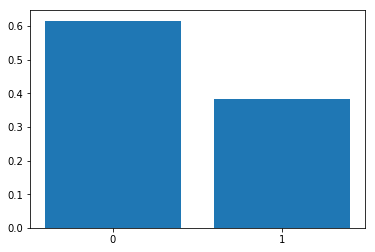

In [10]:
cdt=train_data['Survived'].value_counts()
plt.bar(x=('0','1'),height=cdt/sum(cdt))

1. 性别与存活率的关系

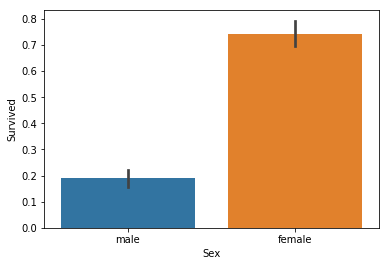

In [11]:
sns.barplot(x = 'Sex' , y = 'Survived',data = train_data)

2.客舱等级和存活率关系

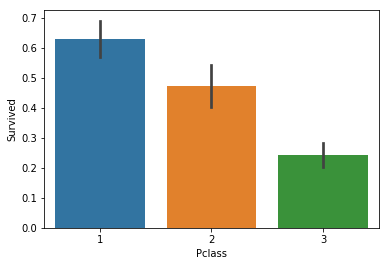

In [12]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data = train_data)

3. 旁系亲属数量和存活率的关系

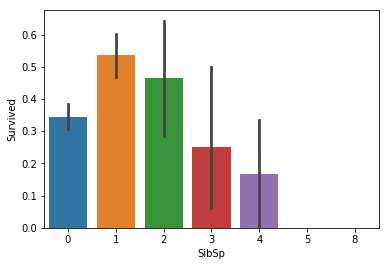

In [13]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data = train_data)

4.直系亲属数量和存活率的关系

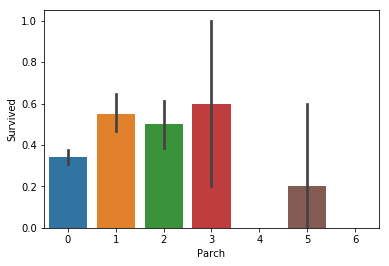

In [14]:
sns.barplot(x = 'Parch' , y = 'Survived' , data = train_data)

5.从不同的生还情况的密度图看，15岁附近的生还率有明显区别

Text(12.3598,0.5,'density')

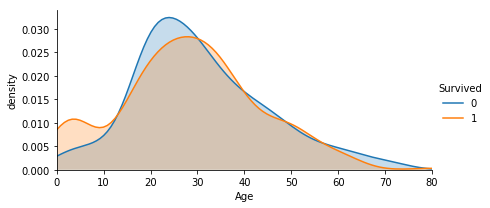

In [15]:
facet = sns.FacetGrid(train_data , hue = 'Survived' , aspect= 2 )
facet.map(sns.kdeplot , 'Age',shade = True)
#kdeplot核密度估计
facet.set(xlim = (0,train_data['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

6.上船港口和存活率的关系


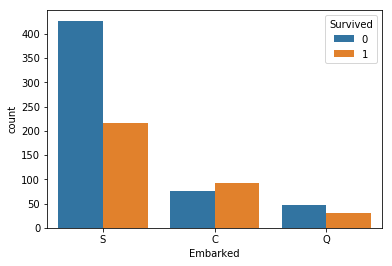

In [16]:
sns.countplot('Embarked' , hue = 'Survived' , data = train_data)

7.不同称呼的乘客幸存率不同(把name中的称呼都提取出来，并且对同个人具有多个称呼标签进行统一）

In [17]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [18]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [19]:
all_data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [20]:
all_data['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
         ...  
1279        Mr
1280    Master
1281        Mr
1282       Mrs
1283    Master
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288       Mrs
1289        Mr
1290        Mr
1291      Miss
1292        Mr
1293      Miss
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299      Miss
1300      Miss
1301      Miss
1302       Mrs
1303      Miss
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

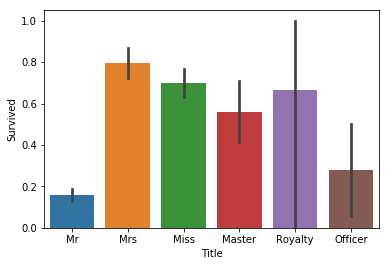

In [21]:
Title_dict = {}
Title_dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
Title_dict.update(dict.fromkeys(['Don','Str','the Countess','Dona','Lady'],'Royalty'))
Title_dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_dict.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_dict.update(dict.fromkeys(['Mr'],'Mr'))
Title_dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

all_data['Title'] = all_data['Title'].map(Title_dict)
sns.barplot(x = 'Title',  y = 'Survived', data = all_data)

8.亲属数量和存活率的关系

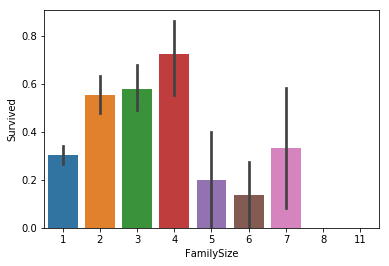

In [22]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x = 'FamilySize' , y = 'Survived' , data = all_data)

9.不同客舱的乘客幸存率不同
（新增Deck特征，先把Cabin空缺值填充为Unknown，再提取Cabin中的首字母构成乘客的甲板号）

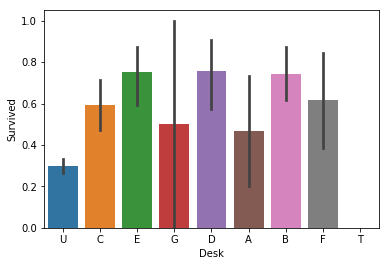

In [23]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Desk'] = all_data['Cabin'].str.get(0)
sns.barplot(x = 'Desk' , y = 'Survived' , data = all_data)

10.共票数与生存率的关系（统计每个乘客的共票数）

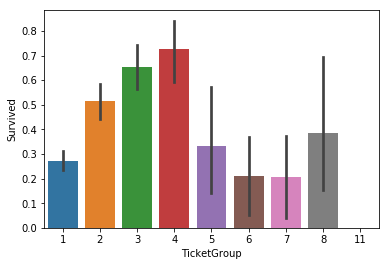

In [24]:
Ticket_count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_count[x])
sns.barplot(x = 'TicketGroup', y = 'Survived' , data = all_data)

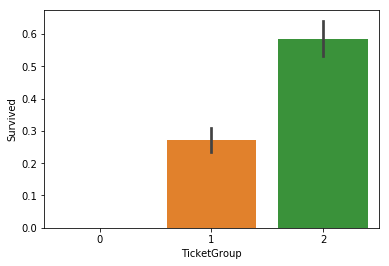

In [25]:
def Ticket_depart(s):
    if (s >= 2) and (s <= 4):
        return 2
    elif ((s>4) and (s<=8)) or (s == 1):
        return 1
    elif s > 8:
        return 0
all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_depart)
sns.barplot(x = 'TicketGroup' , y = 'Survived' , data = all_data)

## 数据清洗

1. 缺失值清洗         
Age缺失值为263，用Sex,Title,Pclass三个特征构建随机森林模型，填充年龄缺失值

In [26]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age','Pclass','Sex','Title']]
age_df = pd.get_dummies(age_df)
#只会将分类变量变成虚拟变量，不会将连续的数值变量变成虚拟变量
age_df

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Age,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,0,1,0,0,1,0,0,0
1,38.0,1,1,0,0,0,0,1,0,0
2,26.0,3,1,0,0,1,0,0,0,0
3,35.0,1,1,0,0,0,0,1,0,0
4,35.0,3,0,1,0,0,1,0,0,0
5,NaN,3,0,1,0,0,1,0,0,0
6,54.0,1,0,1,0,0,1,0,0,0
7,2.0,3,0,1,1,0,0,0,0,0
8,27.0,3,1,0,0,0,0,1,0,0
9,14.0,2,1,0,0,0,0,1,0,0


In [27]:
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
known_age

array([[22. ,  3. ,  0. , ...,  0. ,  0. ,  0. ],
       [38. ,  1. ,  1. , ...,  1. ,  0. ,  0. ],
       [26. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [28. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       [39. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38.5,  3. ,  0. , ...,  0. ,  0. ,  0. ]])

In [28]:
y = known_age[:,0]
X = known_age[:,1:]
rfr = RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
rfr.fit(X,y)
predictedAge = rfr.predict(unknown_age[:,1::])
all_data.loc[(all_data.Age.isnull()) ,'Age'] = predictedAge

In [29]:
predictedAge

array([28.22625599, 32.5356406 , 32.49434306, 28.22625599, 17.33372951,
       28.22625599, 43.11469647, 17.33372951, 28.22625599, 28.22625599,
       28.22625599, 28.22625599, 17.33372951, 28.22625599, 41.5191194 ,
       41.5191194 ,  6.03559861, 28.22625599, 28.22625599, 17.33372951,
       28.22625599, 28.22625599, 28.22625599, 28.22625599, 17.33372951,
       28.22625599, 28.22625599, 17.33372951, 32.49434306, 28.22625599,
       28.22625599,  6.03559861, 43.11469647, 41.5191194 ,  6.03559861,
       17.33372951, 32.5356406 , 41.5191194 , 32.49434306, 28.22625599,
       17.33372951, 28.22625599, 28.22625599, 28.22625599, 17.33372951,
       17.33372951, 17.33372951, 17.33372951, 28.22625599, 43.11469647,
       28.22625599, 17.33372951, 41.5191194 , 17.33372951, 32.5356406 ,
       41.5191194 , 41.5191194 , 41.5191194 , 17.33372951, 28.22625599,
       20.67519139, 28.22625599, 30.11639038, 28.22625599, 17.33372951,
       43.11469647, 28.22625599, 32.49434306, 41.5191194 , 28.22

embarked 也有2个缺失值，根据这个个体的其他信息，直接填充

In [30]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,Desk,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,B,2


In [31]:
all_data.groupby(by=['Pclass','Embarked']).Fare.median()  #用fare的中位数

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [32]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

fare 的缺失值，用中位数填充

In [33]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,Desk,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,U,1


In [34]:
fare = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

2.异常值处理         
- 多人家庭中没有获救的女性和儿童为异常值

In [35]:
all_data['Surname'] = all_data['Name'].apply(lambda x : x.split(',')[0].strip()) 

In [36]:
Surname_count = dict(all_data['Surname'].value_counts())
all_data['Family_count'] = all_data['Surname'].apply(lambda x : Surname_count[x])

In [37]:
#找出所有处于多人家庭的儿童和妇女和成年男性
Female_Child_Count = all_data.loc[(all_data['Family_count'] >= 2) & ((all_data['Age'] <= 12) | (all_data['Sex'] == 'female'))]
Male_Adult_Count = all_data.loc[(all_data['Family_count'] >= 2) & (all_data['Age'] > 12) & (all_data['Sex'] == 'male')]

In [38]:
Female_Child_Count

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,Desk,TicketGroup,Surname,Family_count
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,C,2,Cumings,2
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,C,2,Futrelle,2
7,2.000000,Unknown,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,5,U,1,Palsson,5
8,27.000000,Unknown,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,3,U,2,Johnson,6
9,14.000000,Unknown,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,U,2,Nasser,2
10,4.000000,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,Miss,3,G,2,Sandstrom,3
11,58.000000,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Miss,1,C,1,Bonnell,2
16,2.000000,Unknown,Q,29.1250,"Rice, Master. Eugene",1,17,3,male,4,0.0,382652,Master,6,U,1,Rice,6
18,31.000000,Unknown,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763,Mrs,2,U,2,Vander Planke,4
22,15.000000,Unknown,Q,8.0292,"McGowan, Miss. Anna ""Annie""",0,23,3,female,0,1.0,330923,Miss,1,U,1,McGowan,2


In [39]:
Female_Child = pd.DataFrame(Female_Child_Count.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns = ['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5,0,'AverageSurvived')

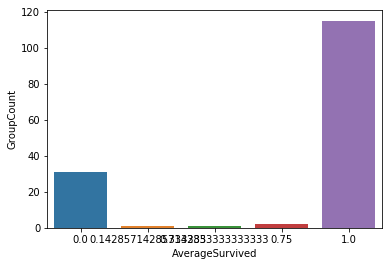

In [40]:
sns.barplot(x = Female_Child.index , y = Female_Child['GroupCount'] , data = all_data).set_xlabel('AverageSurvived')

In [41]:
Male_Adult = pd.DataFrame(Male_Adult_Count.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


普遍规律是女性和儿童的幸存率较高， 成年男性的幸存率较低，所以把不符合普遍规律的反常组选出来单独处理。          
把女性和儿童组里幸存率为0的组设置为遇难组，成年男性组里存活率为1的组设为幸存组，推测处于遇难组的女性和儿童幸存的可能性可能较低，处于幸存组的成年男性幸存的可能性较高。

In [42]:
Female_Child_Count = Female_Child_Count.groupby('Surname')['Survived'].mean()
Dead_List = set(Female_Child_Count[Female_Child_Count.apply(lambda x : x==0)].index)
Dead_List

{'Arnold-Franchi',
 'Attalah',
 'Barbara',
 'Boulos',
 'Bourke',
 'Cacic',
 'Canavan',
 'Caram',
 'Danbom',
 'Ford',
 'Goodwin',
 'Ilmakangas',
 'Johnston',
 'Jussila',
 'Lahtinen',
 'Lefebre',
 'Lobb',
 'Olsson',
 'Oreskovic',
 'Palsson',
 'Panula',
 'Rice',
 'Robins',
 'Rosblom',
 'Sage',
 'Skoog',
 'Strom',
 'Turpin',
 'Van Impe',
 'Vander Planke',
 'Zabour'}

In [43]:
Male_Adult_Count = Male_Adult_Count.groupby('Surname')['Survived'].mean()
Survived_List = set(Male_Adult_Count[Male_Adult_Count.apply(lambda x : x== 1)].index)
Survived_List

{'Beane',
 'Beckwith',
 'Bishop',
 'Bradley',
 'Cardeza',
 'Chambers',
 'Daly',
 'Dick',
 'Duff Gordon',
 'Frauenthal',
 'Frolicher-Stehli',
 'Goldenberg',
 'Greenfield',
 'Harder',
 'Jonsson',
 'Jussila',
 'Kimball',
 'McCoy',
 'Nakid',
 'Taylor'}

将测试集中的异常值改为正常值

In [44]:
#将测试集中所有幸存组的成员改成女性和儿童，将遇难组的都改成男性
train = all_data.loc[all_data['Survived'].notnull()]
test = all_data.loc[all_data['Survived'].isnull()]

test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Title'] = 'Miss'

## 特征转换

In [45]:

all_data = pd.concat([train,test])
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilySize','Desk','TicketGroup']]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived',axis = 1)
X = train.values[:,1:]
y = train.values[:,0]

In [46]:
all_data['Survived'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279     True
1280     True
1281     True
1282     True
1283     True
1284     True
1285     True
1286     True
1287     True
1288     True
1289     True
1290     True
1291     True
1292     True
1293     True
1294     True
1295     True
1296     True
1297     True
1298     True
1299     True
1300     True
1301     True
1302     True
1303     True
1304     True
1305     True
1306     True
1307     True
1308     True
Name: Survived, Length: 1309, dtype: bool

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.feature_selection import SelectKBest
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [49]:
pipe = Pipeline([('select', SelectKBest(k=20)),
            ('classify',RandomForestClassifier(random_state=10,max_features='sqrt'))
            ])
parm_test = {'classify__n_estimators':list(range(20,50,2)),
            'classify__max_depth':list(range(3,60,3))
            }

gsearch = GridSearchCV(estimator=pipe,param_grid=parm_test,scoring='roc_auc',cv = 10)
gsearch.fit(X,y)
print(gsearch.best_params_,gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 44} 0.8774903826102082


In [50]:
from sklearn.pipeline import make_pipeline
select = SelectKBest( k = 20)
clf = RandomForestClassifier(random_state=10,warm_start=True,
                            n_estimators = 26,
                            max_depth = 6,
                            max_features = 'sqrt'
                            )
pipeline = make_pipeline(select,clf)
pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x000001F971D36EA0>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decreas...estimators=26, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

In [51]:

from sklearn import model_selection,metrics
cv_score = model_selection.cross_val_score(pipeline,X,y,cv = 10)
print('CV score: Mean-%.7g | Std -%.7g' % (np.mean(cv_score),np.std(cv_score)))

CV score: Mean-0.8327545 | Std -0.03281119


In [52]:
predictions = pipeline.predict(test)
submission = pd.DataFrame({'PassengerID' : test.index+1 , 'Survived': predictions.astype(np.int32)})
submission.to_csv(r'./submission.csv',index = False)